<a href="https://colab.research.google.com/github/sabrinagois/projetotera_industria/blob/main/EDA_Falhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EDA dos dados de falhas

#### Objetivo: criar modelo de classificação, variável target TX_GRAVIDADE

In [ ]:
# Carregando alguns módulos essenciais para trabalharmos os dados

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [ ]:
#Importando os dados
df_raw = pd.read_csv('tera.csv',
                       sep = ";",
                       header = 0,
                       index_col = False)

In [ ]:
#Verificando os dados importados
df_raw.head()

,COD_AREA,DT_CRIACAO,DT_ENCERRAMENTO,DT_ENVIADO_AVALIACAO,ID_TIPO,ID_SUBTIPO,FL_ACIDENTE_TRAJETO,FL_CLASSIFICACAO,FL_HORA_EXTRA,FL_PARADA,FL_PERDA_MATERIAL,FL_ROTINA,FL_ROTINA.1,ID_CONDICOES_METEOROLOGICAS,FL_TRAB_RESTRITO,TX_IDENTIFICACAO,ID_CATEGORIA_FALHA,ID_CATEGORIA_FALHA.1,ID_TIPO_CONTATO,ID_TIPO_PERDA,ID_TEMPO_EMPRESA,ID_TEMPERATURA_AMBIENTE,TX_GRAVIDADE
0,BC00023,2017-01-01 01:01:46.887,2017-01-03 07:49:41.753,2017-01-01 01:01:47.073,79,119,NaN,NaN,0.0,0.0,NaN,1.0,1.0,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,C
1,BC00023,2017-01-01 08:20:19.890,2017-01-03 07:48:10.680,2017-01-01 08:20:20.077,79,119,NaN,NaN,0.0,0.0,NaN,1.0,1.0,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,C
2,ACM02605,2017-01-01 08:53:52.683,2017-01-09 22:05:36.707,2017-01-01 08:53:52.870,79,119,NaN,NaN,0.0,0.0,NaN,1.0,1.0,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,C
3,BC00023,2017-01-01 09:03:49.970,2017-01-03 07:46:59.747,2017-01-01 09:03:50.160,79,119,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,C
4,ACM02605,2017-01-01 09:06:24.910,2017-09-23 15:52:23.150,2017-01-01 09:06:25.097,79,119,NaN,NaN,0.0,0.0,NaN,1.0,1.0,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,B


In [ ]:
#Verificando os dados importados
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COD_AREA                     5000 non-null   object 
 1   DT_CRIACAO                   5000 non-null   object 
 2   DT_ENCERRAMENTO              4999 non-null   object 
 3   DT_ENVIADO_AVALIACAO         5000 non-null   object 
 4   ID_TIPO                      5000 non-null   int64  
 5   ID_SUBTIPO                   5000 non-null   int64  
 6   FL_ACIDENTE_TRAJETO          21 non-null     float64
 7   FL_CLASSIFICACAO             25 non-null     object 
 8   FL_HORA_EXTRA                4984 non-null   float64
 9   FL_PARADA                    4984 non-null   float64
 10  FL_PERDA_MATERIAL            25 non-null     float64
 11  FL_ROTINA                    4984 non-null   float64
 12  FL_ROTINA.1                  4984 non-null   float64
 13  ID_CONDICOES_METEO

In [ ]:
#Criando uma cópia do dataframe original para trabalhar
df_falhas = df_raw.copy()

In [ ]:
#Transformando o formato das colunas de data
df_falhas['DT_CRIACAO'] = pd.to_datetime(df_falhas['DT_CRIACAO'])
df_falhas['DT_ENCERRAMENTO'] = pd.to_datetime(df_falhas['DT_ENCERRAMENTO'])
df_falhas['DT_ENVIADO_AVALIACAO'] = pd.to_datetime(df_falhas['DT_ENVIADO_AVALIACAO'])

In [ ]:
#Relacionando os nomes de todas as features
df_falhas.columns

Index(['COD_AREA', 'DT_CRIACAO', 'DT_ENCERRAMENTO', 'DT_ENVIADO_AVALIACAO',
       'ID_TIPO', 'ID_SUBTIPO', 'FL_ACIDENTE_TRAJETO', 'FL_CLASSIFICACAO',
       'FL_HORA_EXTRA', 'FL_PARADA', 'FL_PERDA_MATERIAL', 'FL_ROTINA',
       'FL_ROTINA.1', 'ID_CONDICOES_METEOROLOGICAS', 'FL_TRAB_RESTRITO',
       'TX_IDENTIFICACAO', 'ID_CATEGORIA_FALHA', 'ID_CATEGORIA_FALHA.1',
       'ID_TIPO_CONTATO', 'ID_TIPO_PERDA', 'ID_TEMPO_EMPRESA',
       'ID_TEMPERATURA_AMBIENTE', 'TX_GRAVIDADE'],
      dtype='object')

In [ ]:
#Todas as variáveis, com exceção das datas, são categóricas
vars_dt = ['DT_CRIACAO', 'DT_ENCERRAMENTO', 'DT_ENVIADO_AVALIACAO']
vars_categ = ['COD_AREA', 'ID_TIPO', 'ID_SUBTIPO', 'FL_ACIDENTE_TRAJETO', 'FL_CLASSIFICACAO',
       'FL_HORA_EXTRA', 'FL_PARADA', 'FL_PERDA_MATERIAL', 'FL_ROTINA',
       'FL_ROTINA.1', 'ID_CONDICOES_METEOROLOGICAS', 'FL_TRAB_RESTRITO',
       'TX_IDENTIFICACAO', 'ID_CATEGORIA_FALHA', 'ID_CATEGORIA_FALHA.1',
       'ID_TIPO_CONTATO', 'ID_TIPO_PERDA', 'ID_TEMPO_EMPRESA',
       'ID_TEMPERATURA_AMBIENTE', 'TX_GRAVIDADE']
var_target = 'TX_GRAVIDADE'


In [ ]:
#Verificando a cardinalidades das variáveis categóricas
df_falhas[vars_categ].nunique().sort_values(ascending=False)

COD_AREA                       304
ID_TIPO_CONTATO                  9
ID_SUBTIPO                       8
ID_TEMPO_EMPRESA                 7
ID_TEMPERATURA_AMBIENTE          6
ID_CONDICOES_METEOROLOGICAS      6
ID_CATEGORIA_FALHA               5
ID_CATEGORIA_FALHA.1             5
FL_CLASSIFICACAO                 3
TX_GRAVIDADE                     3
FL_PARADA                        2
FL_ROTINA                        2
FL_ROTINA.1                      2
ID_TIPO                          2
TX_IDENTIFICACAO                 2
FL_HORA_EXTRA                    2
FL_ACIDENTE_TRAJETO              2
FL_PERDA_MATERIAL                1
FL_TRAB_RESTRITO                 1
ID_TIPO_PERDA                    0
dtype: int64

In [ ]:
#Verificando o range das variáveis data
for dt in vars_dt:
    print(f"{dt} - de {min(df_falhas[dt]).strftime('%d-%m-%Y')} a {max(df_falhas[dt]).strftime('%d-%m-%Y')}")

DT_CRIACAO - de 01-01-2017 a 21-02-2017
DT_ENCERRAMENTO - de 01-01-2017 a 07-05-2021
DT_ENVIADO_AVALIACAO - de 01-01-2017 a 04-05-2019


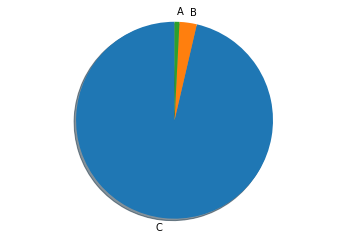

 Taxa de Gravidade C - 4818 ocorrências - 96.36%
 Taxa de Gravidade B - 142 ocorrências - 2.84%
 Taxa de Gravidade A - 40 ocorrências - 0.8%


In [ ]:
#Distribuição das TX_GRAVIDADE

lista_labels = list()
lista_count = list()
for tx in df_falhas[var_target].unique():
    lista_labels.append(tx)
    lista_count.append(df_falhas[var_target][df_falhas[var_target] == tx].count())

fig1, ax1 = plt.subplots()
ax1.pie(lista_count, labels=lista_labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
for tx in df_falhas[var_target].unique():
    print(f" Taxa de Gravidade {tx} - {df_falhas[var_target][df_falhas[var_target] == tx].count()} ocorrências - {100*df_falhas[var_target][df_falhas[var_target] == tx].count()/len(df_falhas)}%")

In [ ]:
# Análise dos códigos de áreas
df_falhas.groupby(['COD_AREA','TX_GRAVIDADE']).count()['DT_CRIACAO']

COD_AREA         TX_GRAVIDADE
ACM01064E        C                24
ACM01067         C                14
ACM01068         C                 8
ACM01101         A                 1
ACM01101a2       C                 1
ACM01103c        B                 1
                 C                20
ACM01103d        C                 8
ACM01104         C                 5
ACM01105         C                15
ACM01106         B                 2
                 C                 4
ACM02053         C                17
ACM02054         C                60
ACM02101         C                20
ACM02103         C                 2
ACM02106         C                12
ACM02109A        C                 4
ACM02109C        C                49
ACM02110c        C                 1
ACM02112         C                 1
ACM02113         C                 9
ACM02116a1       A                 1
                 C                22
ACM02118a        C               111
ACM02124D        C                 2
ACM02138

In [ ]:
#Análise da distribuição das taxas de gravidade pelas outras variáveis categóricas

for j in ['ID_TIPO', 'ID_SUBTIPO', 'FL_ACIDENTE_TRAJETO', 'FL_CLASSIFICACAO',
       'FL_HORA_EXTRA', 'FL_PARADA', 'FL_PERDA_MATERIAL', 'FL_ROTINA',
       'FL_ROTINA.1', 'ID_CONDICOES_METEOROLOGICAS', 'FL_TRAB_RESTRITO',
       'TX_IDENTIFICACAO', 'ID_CATEGORIA_FALHA', 'ID_CATEGORIA_FALHA.1',
       'ID_TIPO_CONTATO', 'ID_TEMPO_EMPRESA',
       'ID_TEMPERATURA_AMBIENTE', 'TX_GRAVIDADE']:
    print(f"{j} - {df_falhas[j].isna().sum()} valores nulos")
    for i in df_falhas[j].unique():
        if not pd.isna(i):    
            print(f"Valor - {i} - {len(df_falhas[j][(df_falhas[j] == i)].isna())} - ocorrências - % Grv C-B-A sobre não nulos - {round(100*len(df_falhas[(df_falhas[j] == i) & (df_falhas['TX_GRAVIDADE'] == 'C')])/len(df_falhas[j][(df_falhas[j] == i)].isna()),2)} - {round(100*len(df_falhas[(df_falhas[j] == i) & (df_falhas['TX_GRAVIDADE'] == 'B')])/len(df_falhas[j][(df_falhas[j] == i)].isna()),2)} - {round(100*len(df_falhas[(df_falhas[j] == i) & (df_falhas['TX_GRAVIDADE'] == 'A')])/len(df_falhas[j][(df_falhas[j] == i)].isna()),2)} %")
    print('')
            
            

ID_TIPO - 0 valores nulos
Valor - 79 - 4806 - ocorrências - % Grv C-B-A sobre não nulos - 96.75 - 2.68 - 0.56 %
Valor - 78 - 194 - ocorrências - % Grv C-B-A sobre não nulos - 86.6 - 6.7 - 6.7 %

ID_SUBTIPO - 0 valores nulos
Valor - 119 - 3792 - ocorrências - % Grv C-B-A sobre não nulos - 97.55 - 2.11 - 0.34 %
Valor - 117 - 161 - ocorrências - % Grv C-B-A sobre não nulos - 88.2 - 4.35 - 7.45 %
Valor - 115 - 429 - ocorrências - % Grv C-B-A sobre não nulos - 94.87 - 2.8 - 2.33 %
Valor - 112 - 25 - ocorrências - % Grv C-B-A sobre não nulos - 80.0 - 16.0 - 4.0 %
Valor - 118 - 544 - ocorrências - % Grv C-B-A sobre não nulos - 92.83 - 6.43 - 0.74 %
Valor - 116 - 8 - ocorrências - % Grv C-B-A sobre não nulos - 75.0 - 25.0 - 0.0 %
Valor - 135 - 33 - ocorrências - % Grv C-B-A sobre não nulos - 93.94 - 6.06 - 0.0 %
Valor - 120 - 8 - ocorrências - % Grv C-B-A sobre não nulos - 100.0 - 0.0 - 0.0 %

FL_ACIDENTE_TRAJETO - 4979 valores nulos
Valor - 0.0 - 20 - ocorrências - % Grv C-B-A sobre não nulos

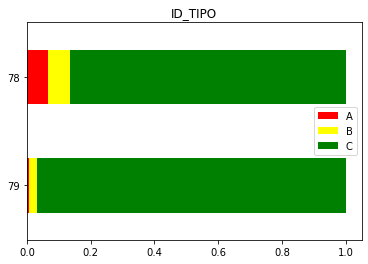

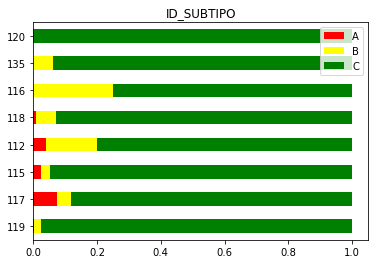

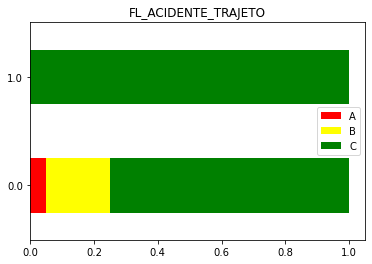

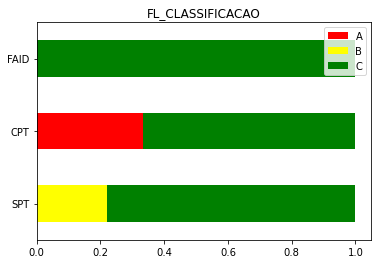

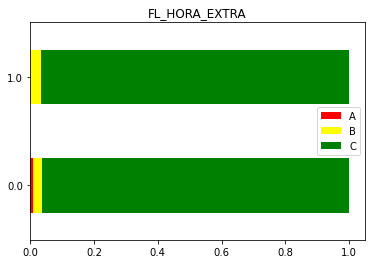

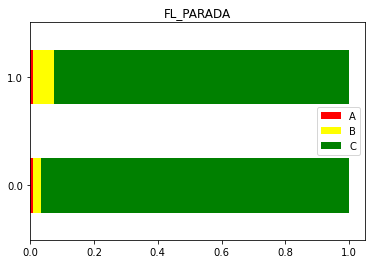

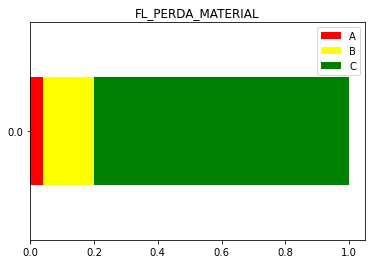

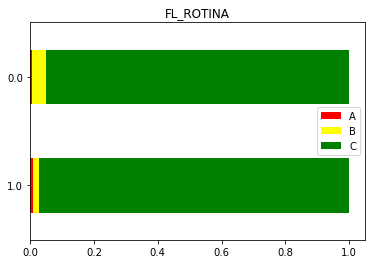

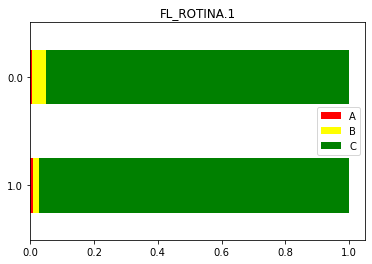

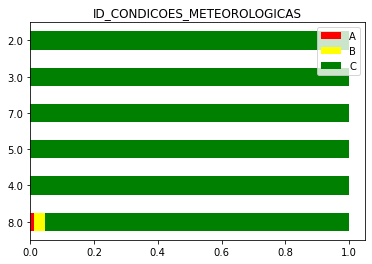

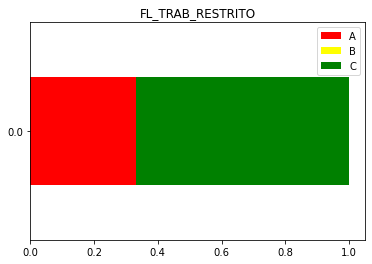

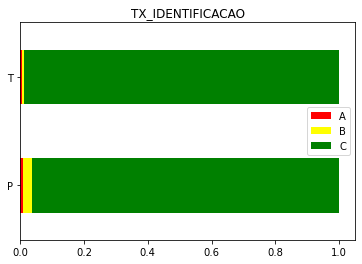

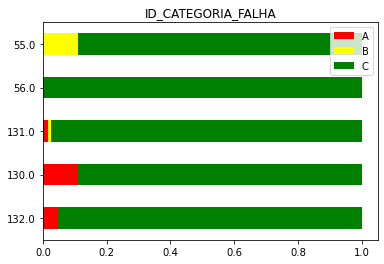

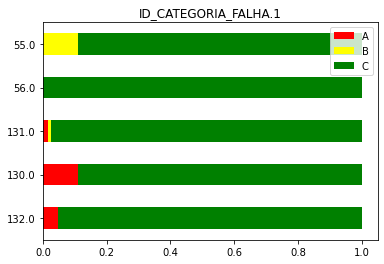

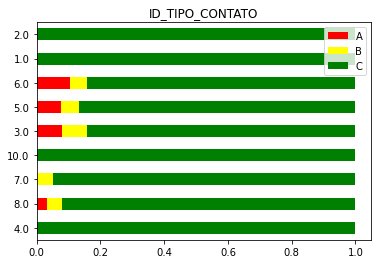

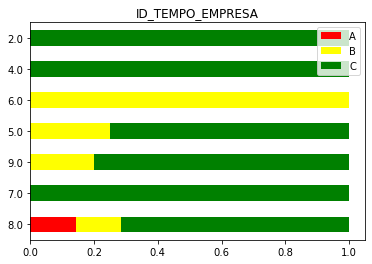

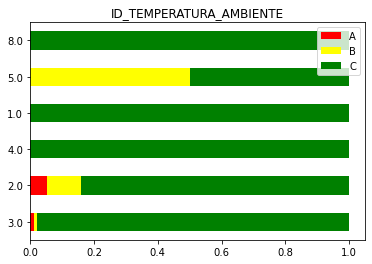

In [ ]:
#Plotando gráficos com as distribuições de TX_GRAVIDADE para cada valor de cada feature categórica
#Considerando apenas os valores que não são nulos

for j in ['ID_TIPO', 'ID_SUBTIPO', 'FL_ACIDENTE_TRAJETO', 'FL_CLASSIFICACAO',
       'FL_HORA_EXTRA', 'FL_PARADA', 'FL_PERDA_MATERIAL', 'FL_ROTINA',
       'FL_ROTINA.1', 'ID_CONDICOES_METEOROLOGICAS', 'FL_TRAB_RESTRITO',
       'TX_IDENTIFICACAO', 'ID_CATEGORIA_FALHA', 'ID_CATEGORIA_FALHA.1',
       'ID_TIPO_CONTATO', 'ID_TEMPO_EMPRESA',
       'ID_TEMPERATURA_AMBIENTE']:
    d = {}   
    for i in df_falhas[j].unique():
        ind = []
        if not pd.isna(i):
            for g in ['A', 'B', 'C']:
                ind.append(len(df_falhas[(df_falhas[j] == i) & (df_falhas['TX_GRAVIDADE'] == g)]))
            d[i]=ind
            
    df_aux = pd.DataFrame(data = d, index = ['A', 'B', 'C'])
    for c in df_aux.columns:
        df_aux[c] = df_aux[c]/df_aux[c].sum()
    
    ax = df_aux.T.plot.barh(color=['red', 'yellow', 'green'], stacked=True, title=j) 